# Question Answer ChatBot

## 1) Importing the libraries

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle
import keras

## 2) Reading data from file

In [0]:
#For training

with open('drive/My Drive/Pytorch_DataSet/TextFiles/train_qa.txt','rb') as f:
  train_data = pickle.load(f)

In [0]:
#For testing

with open('drive/My Drive/Pytorch_DataSet/TextFiles/test_qa.txt','rb') as f:
  test_data = pickle.load(f)

In [25]:
len(train_data), len(test_data)

(10000, 1000)

In [26]:
train_data[0]

(['Mary',
  'moved',
  'to',
  'the',
  'bathroom',
  '.',
  'Sandra',
  'journeyed',
  'to',
  'the',
  'bedroom',
  '.'],
 ['Is', 'Sandra', 'in', 'the', 'hallway', '?'],
 'no')

In [27]:
' '.join(train_data[0][0])

'Mary moved to the bathroom . Sandra journeyed to the bedroom .'

In [28]:
' '.join(train_data[0][1])

'Is Sandra in the hallway ?'

In [29]:
''.join(train_data[0][2])

'no'

In [30]:
type(train_data), type(test_data)

(list, list)

## 3) Creating a dictionary.

Creating a dictionary that contains all the words our train and test set has got so that the test data do not contain any word which is not present in the dictionary.

In [0]:
all_data = train_data + test_data

In [32]:
len(all_data)

11000

In [33]:
train_data[0][0]

['Mary',
 'moved',
 'to',
 'the',
 'bathroom',
 '.',
 'Sandra',
 'journeyed',
 'to',
 'the',
 'bedroom',
 '.']

In [34]:
set(train_data[0][0])

{'.',
 'Mary',
 'Sandra',
 'bathroom',
 'bedroom',
 'journeyed',
 'moved',
 'the',
 'to'}

In [0]:
vocab = set()

for statement,query, answer in all_data:
  vocab = vocab.union(set(statement))
  vocab = vocab.union(set(query))

vocab.add('no')
vocab.add('yes')  


In [36]:
vocab

{'.',
 '?',
 'Daniel',
 'Is',
 'John',
 'Mary',
 'Sandra',
 'apple',
 'back',
 'bathroom',
 'bedroom',
 'discarded',
 'down',
 'dropped',
 'football',
 'garden',
 'got',
 'grabbed',
 'hallway',
 'in',
 'journeyed',
 'kitchen',
 'left',
 'milk',
 'moved',
 'no',
 'office',
 'picked',
 'put',
 'the',
 'there',
 'to',
 'took',
 'travelled',
 'up',
 'went',
 'yes'}

In [0]:
#Adding the pad sequences in case if the string is too short or too long
vocab_len = len(vocab) + 1 # 1 for padding

In [0]:
# Now, checking the length of the longest story that can be used in padding

#Longest story

all_story_len = [len(data[0]) for data in all_data]

In [39]:
all_story_len[:10]

[12, 26, 39, 52, 64, 12, 24, 36, 49, 61]

In [40]:
max_story_len = max(all_story_len)
max_story_len

156

In [41]:
all_question_len = [len(data[1]) for data in all_data]
all_question_len[:10]

[6, 6, 6, 6, 6, 6, 6, 6, 6, 6]

In [42]:
max_question_len = max(all_question_len)
max_question_len

6

## 4) Vectorizing the Data

Conversion of text into numerical values

https://stackoverflow.com/questions/42943291/what-does-keras-io-preprocessing-sequence-pad-sequences-do

In [0]:
from keras.preprocessing.sequence import pad_sequences
from keras.preprocessing.text import Tokenizer

In [0]:
tokenizer = Tokenizer(filters=[])
tokenizer.fit_on_texts(vocab)

In [47]:
tokenizer.word_index

{'.': 31,
 '?': 16,
 'apple': 37,
 'back': 5,
 'bathroom': 11,
 'bedroom': 21,
 'daniel': 27,
 'discarded': 8,
 'down': 35,
 'dropped': 13,
 'football': 33,
 'garden': 18,
 'got': 6,
 'grabbed': 30,
 'hallway': 17,
 'in': 26,
 'is': 22,
 'john': 9,
 'journeyed': 29,
 'kitchen': 32,
 'left': 25,
 'mary': 36,
 'milk': 3,
 'moved': 1,
 'no': 23,
 'office': 24,
 'picked': 15,
 'put': 7,
 'sandra': 12,
 'the': 14,
 'there': 34,
 'to': 10,
 'took': 4,
 'travelled': 19,
 'up': 28,
 'went': 2,
 'yes': 20}

In [0]:
# Separating the story, question and answer from the training set

train_story_text = []
train_question_text = []
train_answer_text = []

for story,question,answer in train_data:
  train_story_text.append(story)
  train_question_text.append(question)
  train_answer_text.append(answer)

In [55]:
train_story_text[:1]

[['Mary',
  'moved',
  'to',
  'the',
  'bathroom',
  '.',
  'Sandra',
  'journeyed',
  'to',
  'the',
  'bedroom',
  '.']]

In [0]:
# Converting the story , question and answer in numerical form

train_story_seq = tokenizer.texts_to_sequences(train_story_text)

In [58]:
train_story_seq[:1]

[[36, 1, 10, 14, 11, 31, 12, 29, 10, 14, 21, 31]]

In [0]:
def vectorize_stories(data, word_index=tokenizer.word_index, max_story_len=max_story_len,max_question_len=max_question_len):
 
  # X = STORIES
  X = []
  # Xq = QUERY/QUESTION
  Xq = []
  # Y = CORRECT ANSWER
  Y = []
  
  
  for story, query, answer in data:
      
    x = [word_index[word.lower()] for word in story]
    xq = [word_index[word.lower()] for word in query]

    # Index 0 is reserved so we're going to use + 1
    y = np.zeros(len(word_index) + 1)
    
    
    y[word_index[answer]] = 1
    
    X.append(x)
    Xq.append(xq)
    Y.append(y)
      
  # Finally, pad the sequences based on their max length so the RNN can be trained on uniformly long sequences.
      
  return (pad_sequences(X, maxlen=max_story_len),pad_sequences(Xq, maxlen=max_question_len), np.array(Y))

In [0]:
inputs_train, queries_train, answers_train = vectorize_stories(train_data)

In [0]:
inputs_test, queries_test, answers_test = vectorize_stories(test_data)

In [63]:
inputs_train

array([[ 0,  0,  0, ..., 14, 21, 31],
       [ 0,  0,  0, ..., 14, 17, 31],
       [ 0,  0,  0, ..., 14, 11, 31],
       ...,
       [ 0,  0,  0, ..., 14, 21, 31],
       [ 0,  0,  0, ...,  3, 34, 31],
       [ 0,  0,  0, ..., 37, 34, 31]], dtype=int32)

In [64]:
inputs_test

array([[ 0,  0,  0, ..., 14, 21, 31],
       [ 0,  0,  0, ..., 14, 18, 31],
       [ 0,  0,  0, ..., 14, 18, 31],
       ...,
       [ 0,  0,  0, ..., 14, 37, 31],
       [ 0,  0,  0, ..., 14, 18, 31],
       [ 0,  0,  0, ..., 37, 34, 31]], dtype=int32)

In [65]:
answers_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

## 5) Building the model

In [0]:
from keras.models import Sequential, Model
from keras.layers.embeddings import Embedding
from keras.layers import Input, Activation, Dense, Permute, Dropout
from keras.layers import add, dot, concatenate
from keras.layers import LSTM

In [0]:
# We have two inputs, stories and questions. So we need to use placeholders. Input() is used to instantiate a Keras tensor.
# PlaceHolder shape = (max_story_len,batch_size)

input_sequence = Input((max_story_len,))
question = Input((max_question_len,))

vocab_size = len(vocab) + 1

Input Encoder m

In [0]:
# Input gets embedded to a sequence of vectors
input_encoder_m = Sequential()
input_encoder_m.add(Embedding(input_dim=vocab_size,output_dim=64))
input_encoder_m.add(Dropout(0.3))

# This encoder will output:
# (samples, story_maxlen, embedding_dim)

Input Encoder c

In [0]:
# embed the input into a sequence of vectors of size query_maxlen
input_encoder_c = Sequential()
input_encoder_c.add(Embedding(input_dim=vocab_size,output_dim=max_question_len))
input_encoder_c.add(Dropout(0.3))
# output: (samples, story_maxlen, query_maxlen)

Question Encoder

In [0]:
# embed the question into a sequence of vectors
question_encoder = Sequential()
question_encoder.add(Embedding(input_dim=vocab_size,output_dim=64,input_length=max_question_len))
question_encoder.add(Dropout(0.3))
# output: (samples, query_maxlen, embedding_dim)

In [0]:
# encode input sequence and questions (which are indices)
# to sequences of dense vectors

# ENCODED <---- ENCODER (INPUT)

input_encoded_m = input_encoder_m(input_sequence)
input_encoded_c = input_encoder_c(input_sequence)
question_encoded = question_encoder(question)

In [0]:
# shape: `(samples, story_maxlen, query_maxlen)`
match = dot([input_encoded_m, question_encoded], axes=(2, 2))
match = Activation('softmax')(match)

In [0]:
# add the match matrix with the second input vector sequence
response = add([match, input_encoded_c])  # (samples, story_maxlen, query_maxlen)
response = Permute((2, 1))(response)  # (samples, query_maxlen, story_maxlen)

In [0]:
# concatenate the match matrix with the question vector sequence
answer = concatenate([response, question_encoded])

In [78]:
answer

<tf.Tensor 'concatenate_1/concat:0' shape=(None, 6, 220) dtype=float32>

In [0]:
# Reduce with RNN (LSTM)
answer = LSTM(32)(answer)  # (samples, 32)

In [0]:
# Regularization with Dropout
answer = Dropout(0.5)(answer)
answer = Dense(vocab_size)(answer)  # (samples, vocab_size)

In [0]:
# we output a probability distribution over the vocabulary
answer = Activation('softmax')(answer)

# build the final model
model = Model([input_sequence, question], answer)
model.compile(optimizer='rmsprop', loss='categorical_crossentropy',metrics=['accuracy'])

In [82]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            (None, 156)          0                                            
__________________________________________________________________________________________________
input_4 (InputLayer)            (None, 6)            0                                            
__________________________________________________________________________________________________
sequential_2 (Sequential)       multiple             2432        input_3[0][0]                    
__________________________________________________________________________________________________
sequential_4 (Sequential)       (None, 6, 64)        2432        input_4[0][0]                    
____________________________________________________________________________________________

## 6) Training the model

In [83]:
# train
history = model.fit([inputs_train, queries_train], answers_train,batch_size=32,epochs=120,validation_data=([inputs_test, queries_test], answers_test))

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 10000 samples, validate on 1000 samples
Epoch 1/120
10000/10000 [==============================] - 5s 519us/step - loss: 0.8716 - accuracy: 0.5003 - val_loss: 0.7011 - val_accuracy: 0.4970
Epoch 2/120
10000/10000 [==============================] - 4s 438us/step - loss: 0.6994 - accuracy: 0.4977 - val_loss: 0.6933 - val_accuracy: 0.4970
Epoch 3/120
10000/10000 [==============================] - 4s 436us/step - loss: 0.6960 - accuracy: 0.4930 - val_loss: 0.6939 - val_accuracy: 0.4970
Epoch 4/120
10000/10000 [==============================] - 4s 440us/step - loss: 0.6946 - accuracy: 0.5048 - val_loss: 0.6950 - val_accuracy: 0.4970
Epoch 5/120
10000/10000 [==============================] - 4s 439us/step - loss: 0.6947 - accuracy: 0.5028 - val_loss: 0.6933 - val_accuracy: 0.4970
Epoch 6/120
10000/10000 [==============================] - 4s 440us/step - loss: 0.6945 - accuracy: 0.4967 - val_loss: 0.6942 - val_accuracy: 0.4970
Epoch 7/120
10000/10000 [==============================] 

## 7) Saving the model

In [0]:
modelname = 'chatbot.h5'
model.save(modelname)

## 8) Plotting the graph of training

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


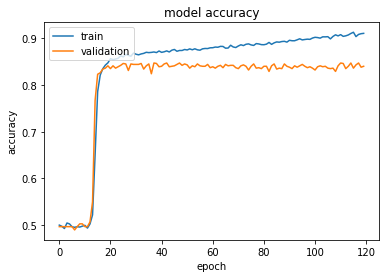

In [87]:
import matplotlib.pyplot as plt
%matplotlib inline
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

## 9) Prediction on Test Set

In [0]:
model.load_weights(modelname)
pred_results = model.predict(([inputs_test, queries_test]))

In [89]:
test_data[0][0]

['Mary',
 'got',
 'the',
 'milk',
 'there',
 '.',
 'John',
 'moved',
 'to',
 'the',
 'bedroom',
 '.']

In [90]:
test_data[0][1]

['Is', 'John', 'in', 'the', 'kitchen', '?']

In [91]:
test_data[0][2]

'no'

In [94]:
pred_results[0]   # Probability of occurence of each word from vocab in the answer.

array([7.2007923e-19, 6.9919850e-19, 7.4148165e-19, 5.5341123e-19,
       4.9508021e-19, 5.5920894e-19, 5.8494475e-19, 7.5741382e-19,
       6.4324051e-19, 8.2057015e-19, 6.3539015e-19, 5.8938640e-19,
       5.7842776e-19, 5.1010253e-19, 6.9749886e-19, 5.9041252e-19,
       6.2742492e-19, 4.5140032e-19, 7.4606671e-19, 6.5306850e-19,
       6.1788984e-07, 5.2651783e-19, 6.3753152e-19, 9.9999940e-01,
       6.3035169e-19, 6.1542791e-19, 7.1467723e-19, 6.0915426e-19,
       5.2559873e-19, 5.4226445e-19, 7.5737629e-19, 6.2120664e-19,
       4.9811307e-19, 4.8479195e-19, 7.2329753e-19, 6.4288731e-19,
       5.4878419e-19, 6.8437077e-19], dtype=float32)

In [95]:
# Generating prediction from model

val_max = np.argmax(pred_results[0])
val_max

23

In [96]:

for key, val in tokenizer.word_index.items():
    if val == val_max:
        k = key

print("Predicted answer is: ", k)
print("Probability of certainty was: ", pred_results[0][val_max])

Predicted answer is:  no
Probability of certainty was:  0.9999994


## 10) Making our own story

we can only use words from our current vocabulary as our model only know these words.

In [97]:
vocab

{'.',
 '?',
 'Daniel',
 'Is',
 'John',
 'Mary',
 'Sandra',
 'apple',
 'back',
 'bathroom',
 'bedroom',
 'discarded',
 'down',
 'dropped',
 'football',
 'garden',
 'got',
 'grabbed',
 'hallway',
 'in',
 'journeyed',
 'kitchen',
 'left',
 'milk',
 'moved',
 'no',
 'office',
 'picked',
 'put',
 'the',
 'there',
 'to',
 'took',
 'travelled',
 'up',
 'went',
 'yes'}

In [98]:
# Put whitespace of the periods as we want our story and question format to be in same order as that of training and test set
my_story = "John left the kitchen . Sandra dropped the football in the garden ."
my_story.split()

['John',
 'left',
 'the',
 'kitchen',
 '.',
 'Sandra',
 'dropped',
 'the',
 'football',
 'in',
 'the',
 'garden',
 '.']

In [99]:
my_question = "Is the football in the garden ?"
my_question.split()

['Is', 'the', 'football', 'in', 'the', 'garden', '?']

In [0]:
mydata = [(my_story.split(),my_question.split(),'yes')]
my_story,my_ques,my_ans = vectorize_stories(mydata)

In [101]:
my_story

array([[ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  9,
        25, 14, 32, 31, 12, 13, 14, 33, 26, 14, 18, 31]], dtype=int32)

In [102]:
my_ques

array([[14, 33, 26, 14, 18, 16]], dtype=int32)

In [103]:
my_ans

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0.]])

In [0]:
pred_results = model.predict(([ my_story, my_ques]))

In [105]:
#Generate prediction from model
val_max = np.argmax(pred_results[0])

for key, val in tokenizer.word_index.items():
    if val == val_max:
        k = key

print("Predicted answer is: ", k)
print("Probability of certainty was: ", pred_results[0][val_max])

Predicted answer is:  yes
Probability of certainty was:  0.9998535
